# Regularized Classification on Student Alcohol Dataset

The dataset is gathered from Kaggle (https://www.kaggle.com/uciml/student-alcohol-consumption)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline  
import matplotlib.pyplot as plt
np.random.seed(521212)

In [2]:
# read the data from the csv file
df = pd.read_csv("data/student-data.csv", sep=',')

# let's see some statistics about the data 
df.describe()

,drink_alcohol,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,Marks
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.454545,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.184900,3.536210,3.659476,11.906009
std,0.498314,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175766,1.446259,4.640759,3.230656
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,10.000000
50%,0.000000,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,12.000000
75%,1.000000,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,6.000000,14.000000
max,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


In [3]:
Data = df.values
X_categorical = Data[:,1:]
# the target value (class) is in the first column
Y = Data[:,0]

print(list(df))

# the number d of features of each sample
d = X_categorical.shape[1]

# the number m of samples
m = X_categorical.shape[0]

# the number of samples is
print("Number of samples: {}".format(m))

# categorical variables using integers and one-hot-encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(categories='auto')


# the first column of the data matrix into indicator variables
X_tmp = label_encoder.fit_transform(X_categorical[:,0])
X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
X = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
print("Categorical feature:", df.columns[1], "   Number of categories:", X[1,:].shape)


# repeat for the other categorical input variables
index_categorical = [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(1,19):
    if i in index_categorical:
        X_tmp = label_encoder.fit_transform(X_categorical[:,i])
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X_tmp = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
        X = np.hstack((X,X_tmp))
        print("Categorical feature:", df.columns[i+1], "   Number of categories:", X_tmp[1,:].shape)
    else:
        X_tmp = X_categorical[:,i]
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X = np.hstack((X,X_tmp))
        print("Valued feature:", df.columns[i+1])
        
print("Shape of X:", X.shape)
print("Sample element from X:", X[20,:])

['drink_alcohol', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Marks']
Number of samples: 649
Categorical feature: school    Number of categories: (2,)
Categorical feature: sex    Number of categories: (2,)
Valued feature: age
Categorical feature: address    Number of categories: (2,)
Categorical feature: famsize    Number of categories: (2,)
Categorical feature: Pstatus    Number of categories: (2,)
Categorical feature: Medu    Number of categories: (5,)
Categorical feature: Fedu    Number of categories: (5,)
Categorical feature: Mjob    Number of categories: (5,)
Categorical feature: Fjob    Number of categories: (5,)
Categorical feature: guardian    Number of categories: (3,)
Categorical feature: traveltime    Number of categories: (4,)
Categorical feature: studytime    Number of categories: (4,)
Categorical feature: famrel    Number of categories:

In [4]:
# Data Preprocessing

# the target labels
Y = label_encoder.fit_transform(Y)
K = max(Y) + 1 # number of classes

print("Number of classes: "+str(K))

# Split data into training and validation data

# number of samples
m = np.shape(X)[0]

permutation = np.random.permutation(m)
X = X[permutation]
Y = Y[permutation]

m_training = 100 #  # 100 samples for training + validation...
m_test = m-m_training 

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = 521212)

print(Y_training)

m_training = X_training.shape[0]
m_test = X_test.shape[0]

print(float(sum(Y_training)+sum(Y_test))/float(m_training+m_test))

Number of classes: 2
[1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1]
0.45454545454545453


In [5]:
# Standardization of the Features Matrix
from sklearn import preprocessing

X = X.astype(np.float64) 
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)

# the standard scaling
scaler = preprocessing.StandardScaler().fit(X)

X_training = scaler.transform(X_training)
X_test = scaler.transform(X_test)

print(X_test)

[[ 0.73094388 -0.73094388 -1.19993734 ... -0.78898669 -0.78915946
  -0.28065755]
 [ 0.73094388 -0.73094388  0.83337685 ... -0.78898669 -0.78915946
   1.26820936]
 [-1.36809408  1.36809408 -1.19993734 ...  1.2674485   1.5829708
  -0.59043093]
 ...
 [ 0.73094388 -0.73094388  0.83337685 ... -0.78898669 -0.78915946
   0.6486626 ]
 [ 0.73094388 -0.73094388  0.83337685 ... -0.78898669 -0.78915946
   0.02911583]
 [ 0.73094388 -0.73094388 -1.19993734 ...  1.2674485   0.07343336
   0.02911583]]


In [8]:
reg = linear_model.LogisticRegressionCV(Cs=[100000000], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
reg.fit(X_training, Y_training)

# the values of C evaluated in cross-validation;
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( reg.Cs_ ))

# the average accuracy across the 10 folds
CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)

# the average accuracies obtained for the various values of C
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the best value of C as identified by cross-validation;
print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( reg.C_[0] ))

# the best CV accuracy, and then print it
print(type(reg.scores_))
reg_best_CV_accuracy = max(reg.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( reg_best_CV_accuracy ))

Values of parameter C tried in 10-fold Cross-Validation: [100000000]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.52]
Best value of parameter C according to 10-fold Cross-Validation: 100000000
<class 'dict'>
10-fold Cross-Validation accuracies obtained with the best value of parameter C: [0.8]


Coefficients obtained using the entire training set: [[ 0.88094966 -0.88094966 -0.41538158  0.41538158  0.13835414 -0.34495143
   0.34495143  0.09470007 -0.09470007  0.03643915 -0.03643915 -3.02832882
  -0.65225711  0.05383952  1.24919037  0.05261164 -0.01878807  0.45643146
  -0.09096967 -0.20169721 -0.19296709 -0.21690052  0.25070205 -0.23023138
  -0.03330118  0.4733284  -0.35603835 -0.10050169 -0.09384869  0.43991834
  -0.19479662 -0.56313065 -1.30427908  3.43687634 -0.51755585  0.2950065
   0.46488627 -0.06621145  0.13548475 -0.00485725 -0.22665974  0.08720162
   0.14723842 -0.83607855  0.28948853  0.27822622 -0.21871972  0.74248372
  -0.52760594  0.02854754 -0.04304787  0.04070483 -1.29277245 -0.12920034
  -0.26148414  0.32378132  1.01330152 -0.45140657  0.49669555 -0.22672213
  -0.61701859  0.64456007 -0.36875573 -0.9554094 ]]
Intercept: [0.17992805]


C:\Users\yukse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


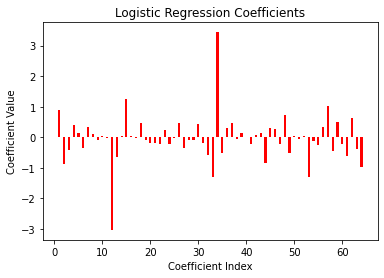

0.87
best value of parameter C: 0.87


In [6]:
# Logistic Regression

reg_full = linear_model.LogisticRegression(dual=False, tol=0.0001, C=5000000, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None)  #ADD CODE
reg_full.fit(X_training, Y_training)

# the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))
print("Intercept: {}".format( reg_full.intercept_ ))

# Plot the coefficients
reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='r')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

reg_full_best_accuracy = reg_full.score(X_training,Y_training)
print(reg_full_best_accuracy)
print("best value of parameter C: {}".format( reg_full_best_accuracy ))


In [9]:
# prediction on training data
Y_training_prediction_LR = reg.predict(X_training) # COMPLETE

# accuracy for training dataset
print("Training Accuracy:", metrics.accuracy_score(Y_training, Y_training_prediction_LR))
# COMPLETE

# prediction on test data
Y_test_prediction_LR = reg.predict(X_test) # COMPLETE
111
# accuracy for test dataset
print("Test Accuracy:", metrics.accuracy_score(Y_test, Y_test_prediction_LR))

Training Accuracy: 0.87
Test Accuracy: 0.5974499089253188


In [10]:
# L2 regularized logistic regression with cross-validation

regL2 = linear_model.LogisticRegressionCV(Cs=[60000], solver='newton-cg',cv=10, penalty='l2') 
regL2.fit(X_training, Y_training) 

# the values of C evaluated in cross-validation;
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( regL2.Cs_ ))

# the average accuracy across the 10 folds
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10)

# the average accuracies obtained for the various values of C
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the best value of C as identified by cross-validation;
print("Best value of C with 10-fold Cross-Validation: {}".format( regL2.C_ ))

# the best CV accuracy
print(regL2.scores_[1])
regL2_best_CV_accuracy = np.max(regL2.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( regL2_best_CV_accuracy ))

# the model using the best C
regL2_best = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.7, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None) 
# COMPLETE
# the model using the best C on the entire training set
regL2_best.fit(X_training, Y_training)

Values of parameter C tried in 10-fold Cross-Validation: [60000]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.53]
Best value of C with 10-fold Cross-Validation: [60000]
[[0.6]
 [0.4]
 [0.7]
 [0.5]
 [0.4]
 [0.3]
 [0.8]
 [0.5]
 [0.5]
 [0.6]]
10-fold Cross-Validation accuracies obtained with the best value of parameter C: 0.8


LogisticRegression(C=0.7, solver='newton-cg')

Coefficients obtained using the entire training set: [[ 0.88094966 -0.88094966 -0.41538158  0.41538158  0.13835414 -0.34495143
   0.34495143  0.09470007 -0.09470007  0.03643915 -0.03643915 -3.02832882
  -0.65225711  0.05383952  1.24919037  0.05261164 -0.01878807  0.45643146
  -0.09096967 -0.20169721 -0.19296709 -0.21690052  0.25070205 -0.23023138
  -0.03330118  0.4733284  -0.35603835 -0.10050169 -0.09384869  0.43991834
  -0.19479662 -0.56313065 -1.30427908  3.43687634 -0.51755585  0.2950065
   0.46488627 -0.06621145  0.13548475 -0.00485725 -0.22665974  0.08720162
   0.14723842 -0.83607855  0.28948853  0.27822622 -0.21871972  0.74248372
  -0.52760594  0.02854754 -0.04304787  0.04070483 -1.29277245 -0.12920034
  -0.26148414  0.32378132  1.01330152 -0.45140657  0.49669555 -0.22672213
  -0.61701859  0.64456007 -0.36875573 -0.9554094 ]]
Intercept: [0.17992805]
Coefficients obtained using the entire training set: [[ 3.87883167e-01 -3.87883167e-01 -2.63586480e-01  2.63586480e-01
   2.08524727

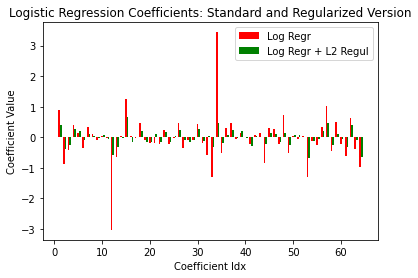

In [11]:
# The coefficients from logistic regression
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))
# the coefficients from L2 regularized logistic regression
print("Intercept: {}".format( reg_full.intercept_ ))

regL2_full = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.7, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
regL2_full.fit(X_training, Y_training)
print("Coefficients obtained using the entire training set: {}".format( regL2_full.coef_ ))
print("Intercept: {}".format( regL2_full.intercept_ ))

# Plot the coefficients
regL2_full_coef = regL2_full.coef_.reshape(regL2_full.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='g')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()